## QXD0178 - Mineração de Dados
# Agrupamento de dados

# Lista de Exercícios: Agrupamento de dados

Nesta lista de exercícios, você explorará a aplicação de métodos de aprendizado de máquina para realizar tarefas de agrupamento de dados (*clustering*). Você usará a base de dados [Iris plants dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) e avaliará algoritmos de agrupamento para comparar sua efetividade. O objetivo é entender como diferentes métodos de aprendizado de máquina se comportam em relação à tarefa de agrupamento de dados.

Você deverá utilizar os algoritmos [K-Means](https://scikit-learn.org/stable/modules/clustering.html#k-means), [Gaussian Mixture](https://scikit-learn.org/stable/modules/mixture.html#mixture) e [DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan) e comparar o resultado produzido por cada modelo para o seguinte conjunto de hiperparâmtros, quando aplicável aquele modelo.

* K-means: 
    * Centróides (`n_clusters`): 2, 3, e 6.    
* Gaussian Mixture
    * Componentes (`n_components`): 2, 3, e 6
    * Covariância (`covariance_type`): `'full'`, `'diag'` e `'spherical'`
* DBSCAN:
    * Distância (`eps`): 0.5, 1 e 1.5.
    * Mínimo de amostras (`min_samples`): 5, 10 e 25.


Como parte do objetivo praticar visualizações de dados, para cada experimento, você deve replicar a seguinte visualização usando apenas o [matplotlib](https://matplotlib.org/stable/users/index).

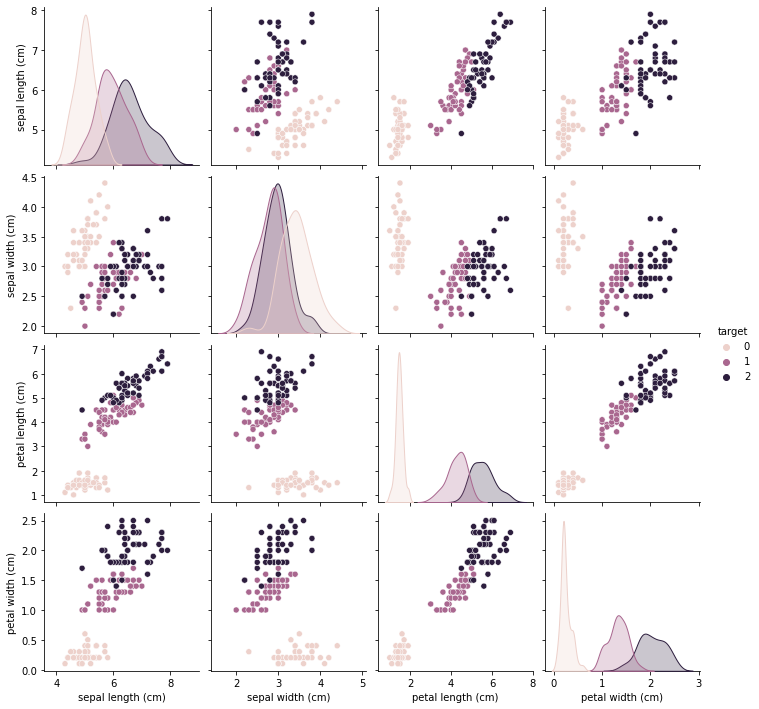

Você deve executar o experimento para cada par *features*, colorindo de acordo com o resultado fornecido pelo modelo de clusterização. Nos elementos da diagonal, você deve executar o cálculo de densidade dos elementos do conjunto usando `KDE` (`bandwidth=1.0, kernel='gaussian'`), também de acordo com a saída do modelo. Compare os experimentos entre si e com o que deveria ser a saída correta dos dados, segundo os rótulos originais do *dataset*. 

Documente todas as etapas em um arquivo Jupyter Notebook (`.ipynb`) que inclua as análises, o código e as justificativas. Lembre-se de que é fundamental justificar todas as decisões tomadas ao longo do processo e documentar as análises de forma clara e concisa. Este trabalho tem como objetivo proporcionar uma compreensão prática da seleção e avaliação de algoritmos de agrupamento em cenários de aprendizado não-supervisionado.

Envie seu Jupyter Notebook até a data de entrega especificada nesta tarefa.

## Solução


### Carga do conjunto de dados

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### OBS
Como complemento a visualização dos dados, usei as duas bibliotecas mais famosas que seria o [Matplotlib](https://matplotlib.org/) e o [Seaborn](https://seaborn.pydata.org/).
A sequência lógica que é aplicada é :
1. Carregamento do dataset.
2. Criação do **DataFrame**.
3. Normalização dos dados com o StandarScaler.
4. Execução do *fit_transform* para ajustar e transformar os dados.
5. Criação do modelo junto aos parâmetros estabelecidos previamente.
6. Ajuste do modelo para os dados normalizados usando o *fit_predict*
7. Plotagem do gráfico resultado

Uso da biblioteca **warning** para que não aparece avisos que pode atrapalhar no entendimento contínuo do notebook.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

### K-means

#### n_clusters = 2

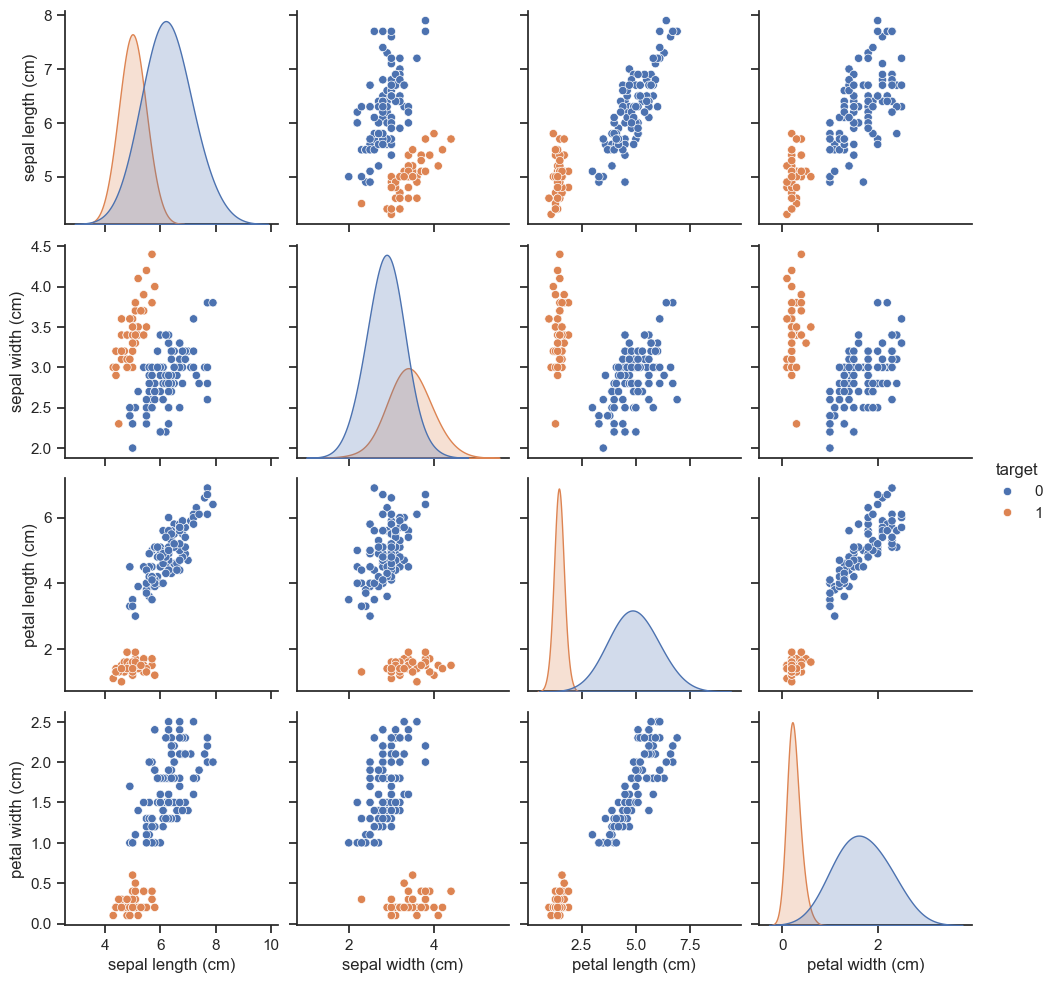

In [12]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
# Carregamento dos dados
iris = load_iris()
# Criação do DataFrame  
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Normalização dos dados para que estejam com média 0 e variância 1
scaler = StandardScaler()
# X_scaled recebe os dados normalizados e faz o fit_transform
X_scaled = scaler.fit_transform(df)

# Criação do modelo KMeans com 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
# Ajuste do modelo para os dados normalizados para prever os clusters
df['target'] = kmeans.fit_predict(X_scaled)

sns.set(style="ticks")
"""
Gráfico de pares com todas as relações entre as combinações possíveis de variáveis numéricas
hue: variável que define a cor de cada ponto baseado no target
diag_kws: dicionário de argumentos para o gráfico da diagonal
bw: largura da banda do KDE -> quanto maior, mais suave
kernel: tipo de kernel utilizado no KDE -> gaussiano
"""
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gau'})
plt.show()


#### n_clusters = 3

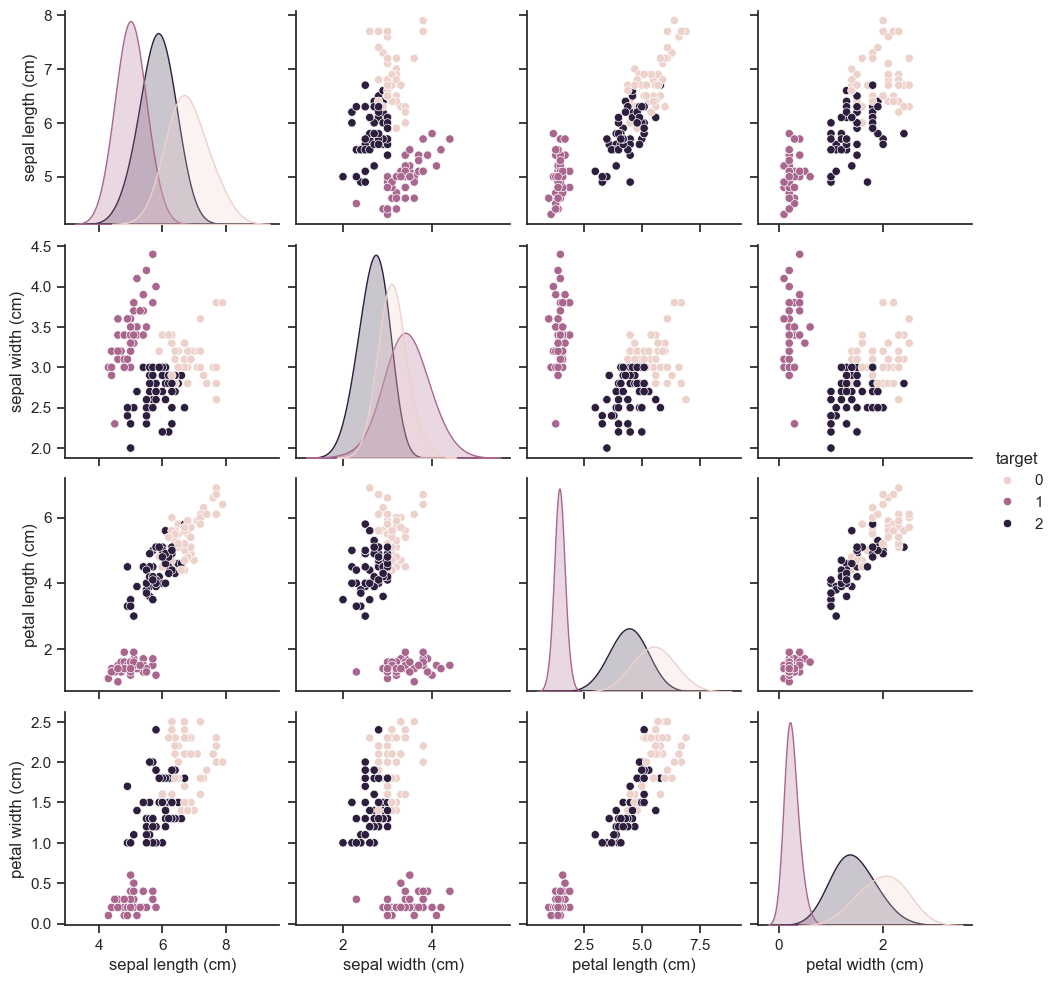

In [4]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Criação do modelo KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['target'] = kmeans.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

#### n_clusters = 6

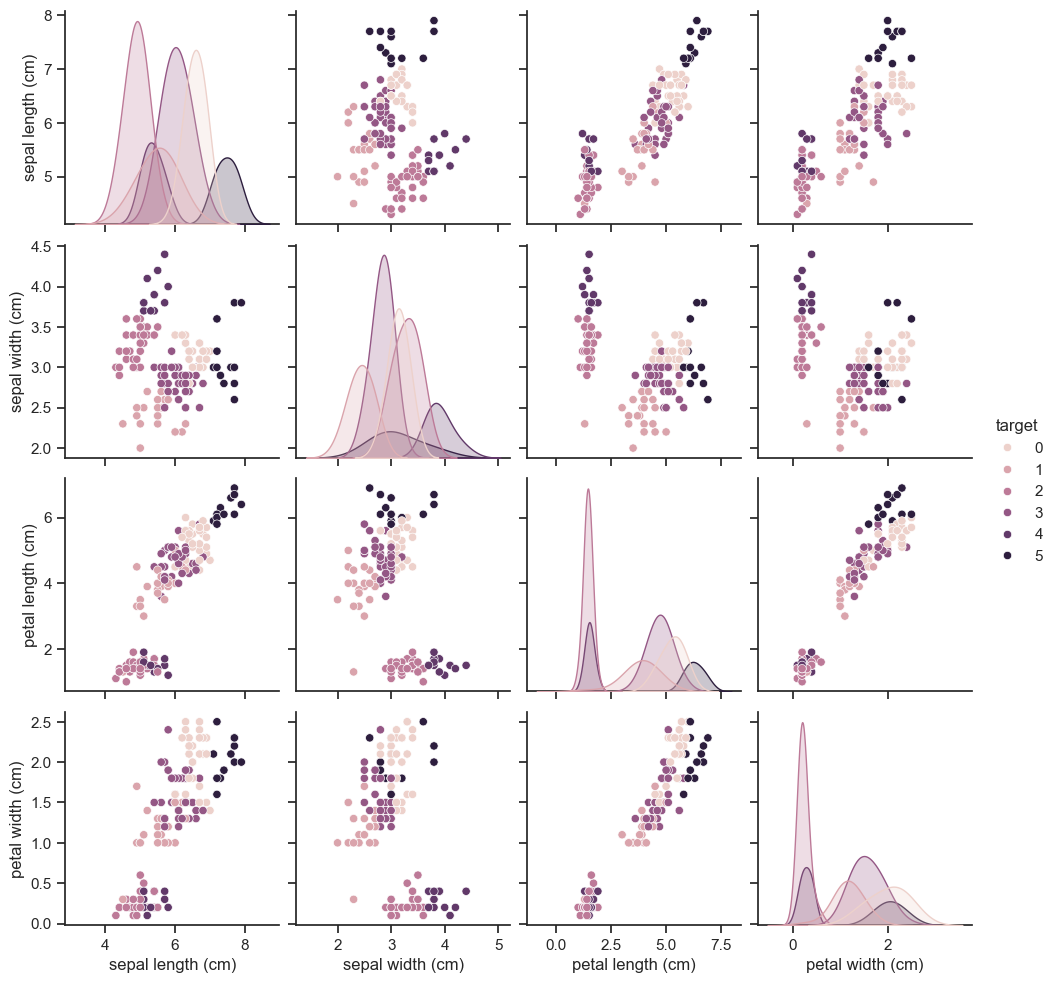

In [ ]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Criação do modelo KMeans com 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
df['target'] = kmeans.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

### Gaussian

#### n_components = 2 e covariance_type = full

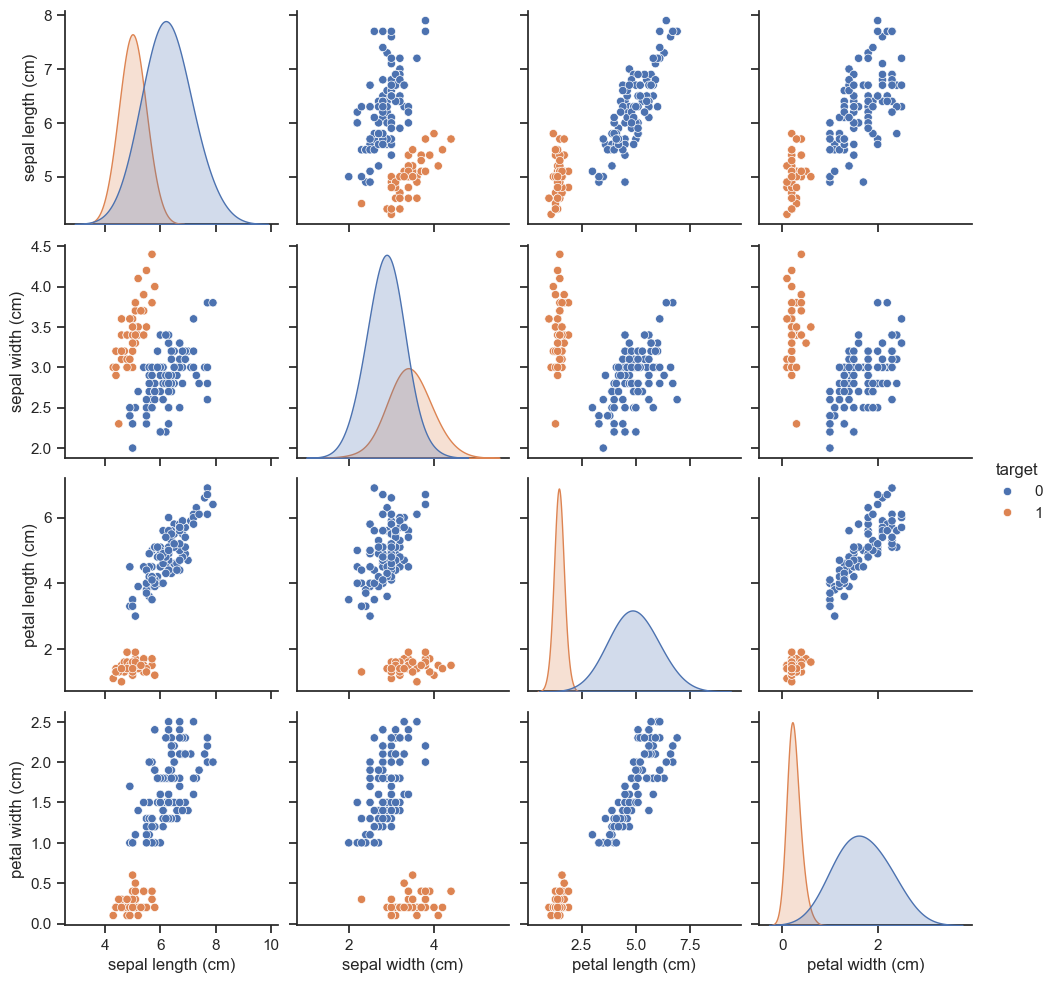

In [6]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Criação do modelo GaussianMixture com 2 clusters
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
df['target'] = gmm.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

#### n_components = 3 e covariance_type = diag

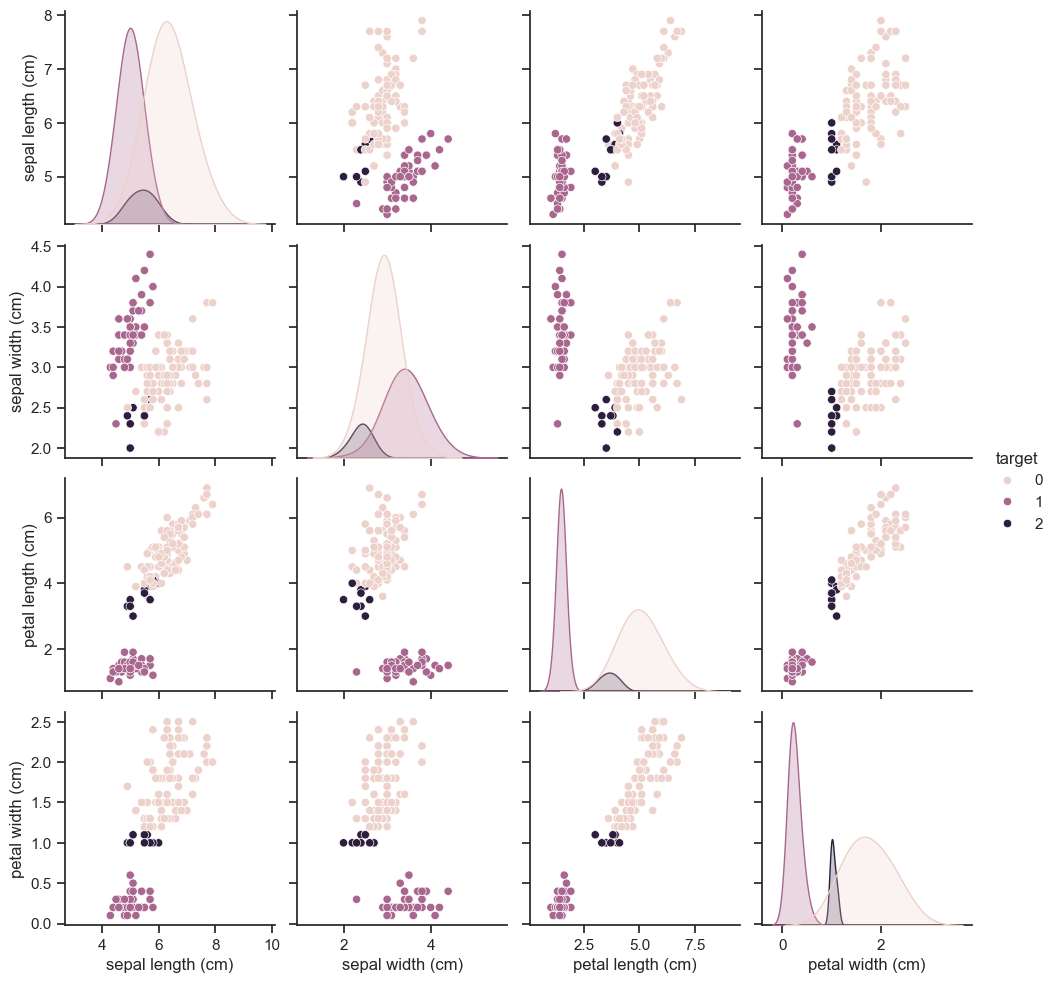

In [7]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Criação do modelo GaussianMixture com 3 clusters
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)
df['target'] = gmm.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

#### n_components =  6 e covariance_type = spherical

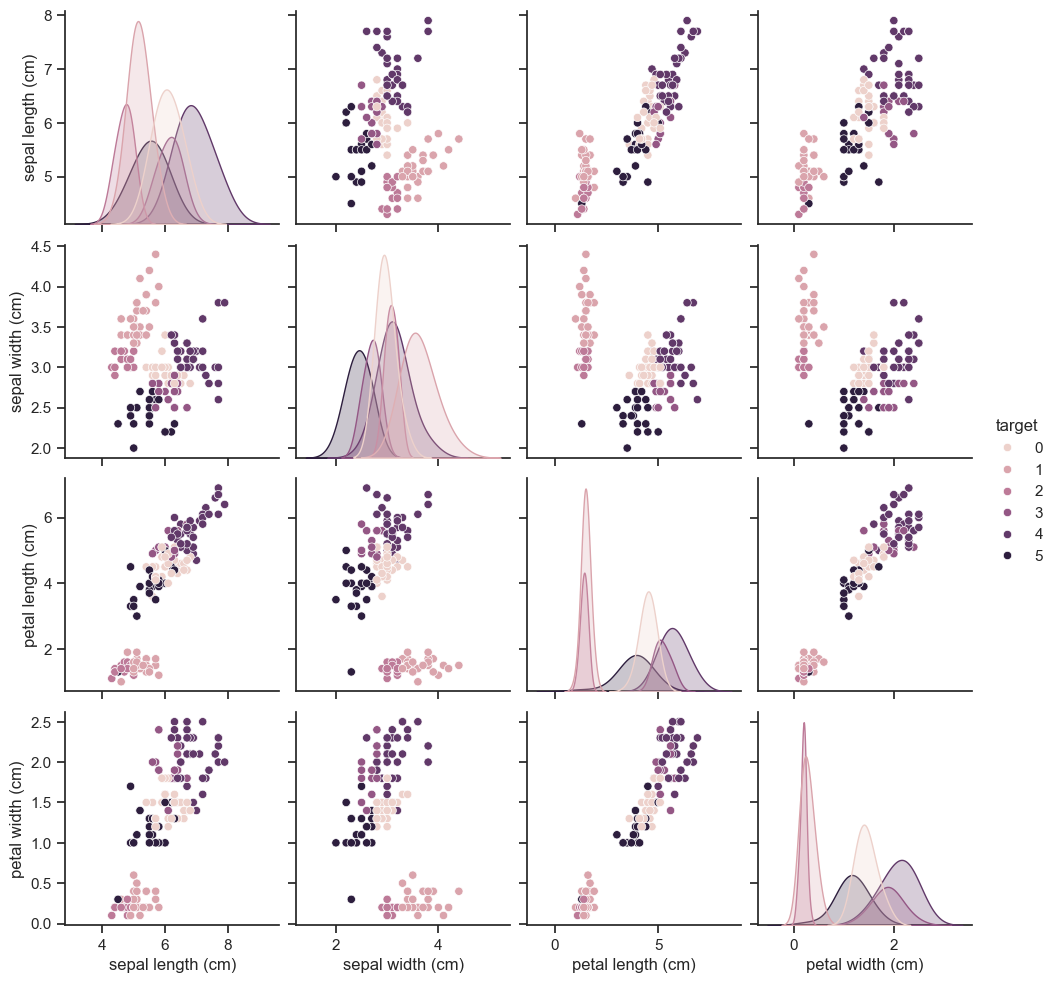

In [8]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Criação do modelo GaussianMixture com 6 clusters
gmm = GaussianMixture(n_components=6, covariance_type='spherical', random_state=42)
df['target'] = gmm.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

### DBSCAN

#### eps = 0.5 e min_samples = 5

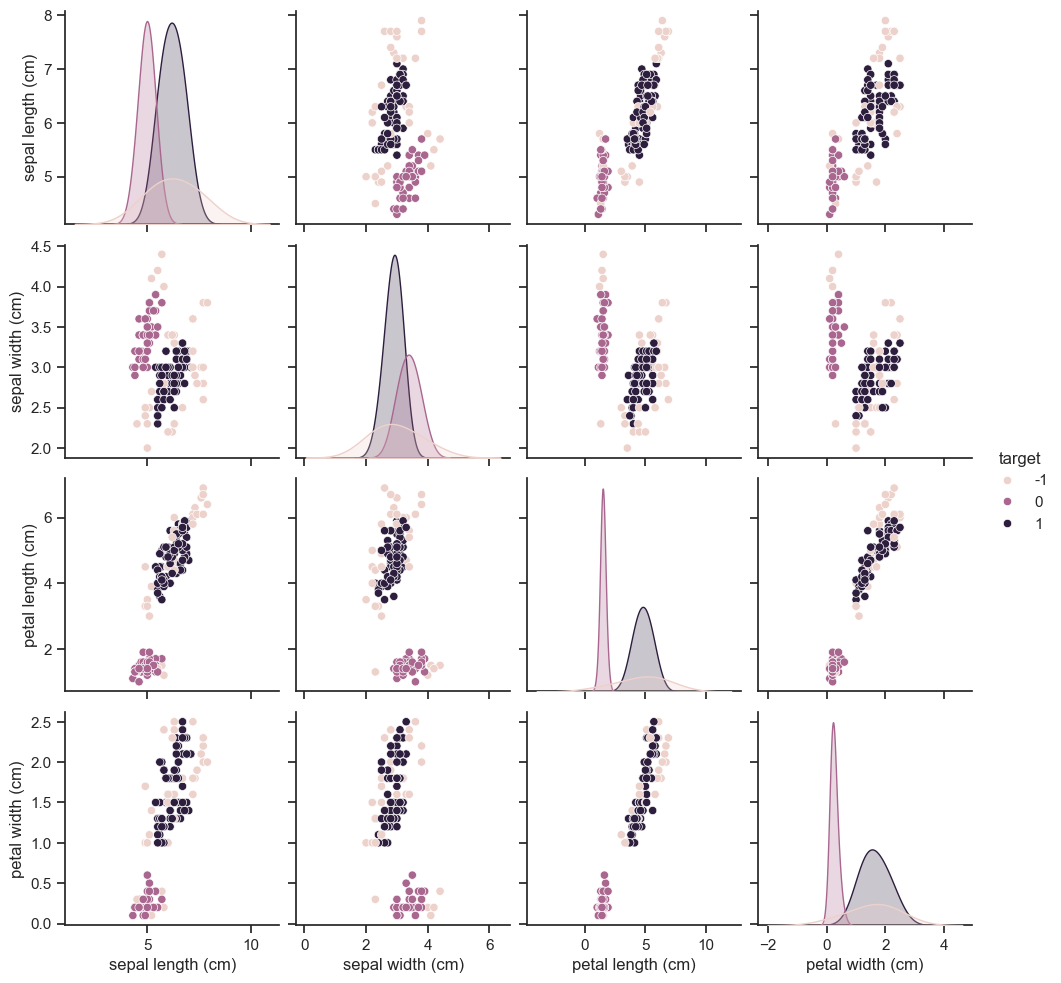

In [ ]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

"""
Criação do modelo DBSCAN com os seguintes parâmetros:
eps: distância máxima entre duas amostras para serem consideradas no mesmo cluster
min_samples: número mínimo de amostras em uma vizinhança para ser considerado um cluster
"""
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['target'] = dbscan.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

#### eps = 1 e min_samples = 10

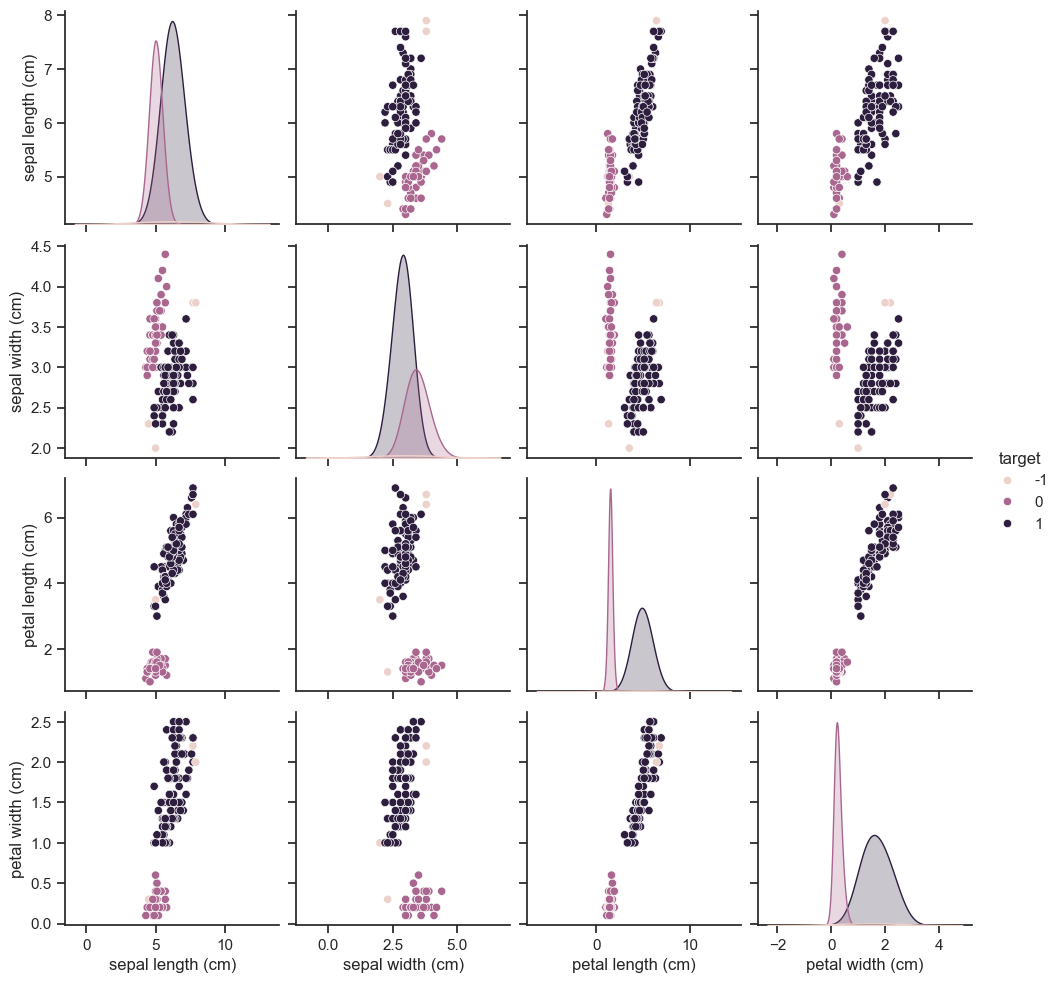

In [10]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

dbscan = DBSCAN(eps=1.0, min_samples=10)
df['target'] = dbscan.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

#### eps = 1.5 e min_samples = 25

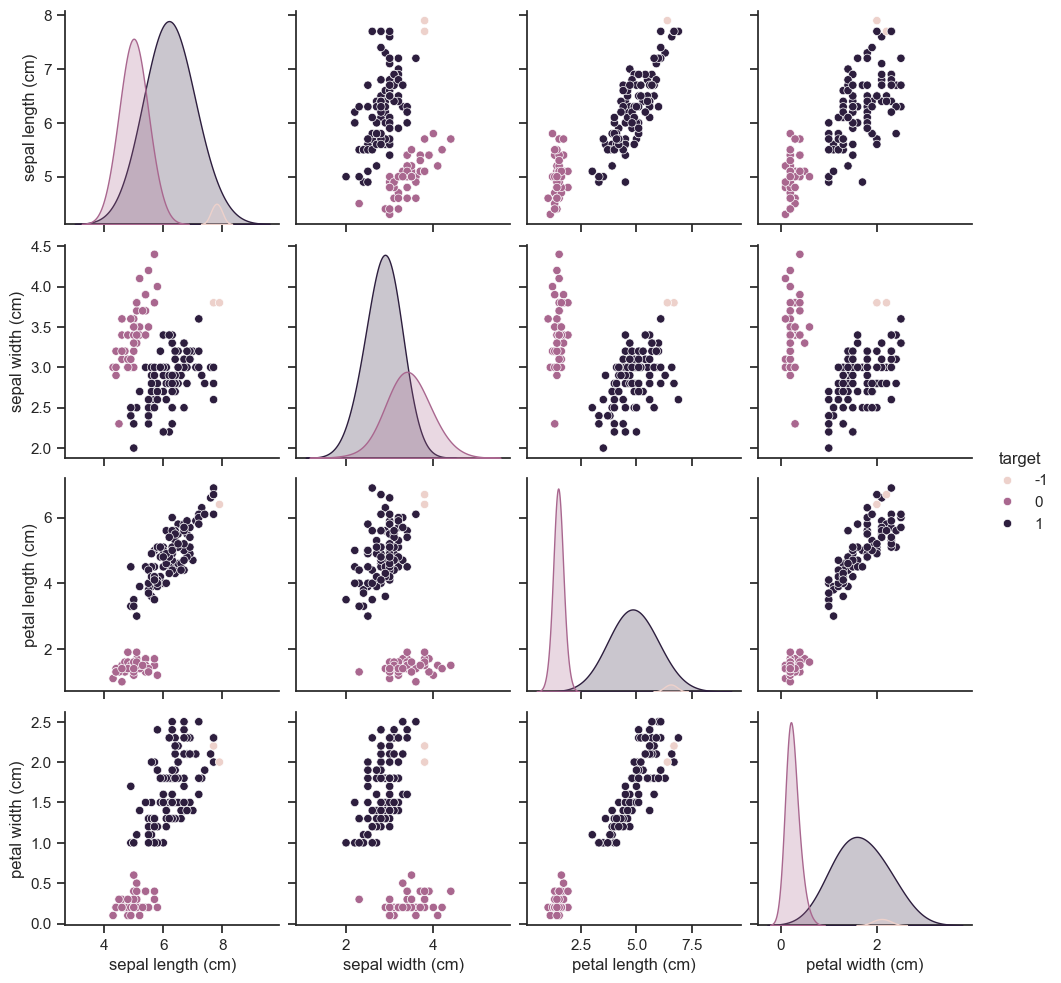

In [11]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

dbscan = DBSCAN(eps=1.5, min_samples=25)
df['target'] = dbscan.fit_predict(X_scaled)

sns.set(style="ticks")
sns.pairplot(df, hue="target", diag_kws={'bw': 1.0, 'kernel': 'gaussian'})
plt.show()

### Análise dos resultados

### K-means
- **n_clusters = 2**:
    - Agrupou os dados de maneira clara e consistente.
    - Resultados semelhantes ao dataset original, considerando que temos apenas 2 grupos.
    - Funcionamento baseado em centróides.

- **n_clusters = 3**:
    - Separou os dados em grupos consistentes.
    - Alguns pontos de um mesmo grupo foram colocados entre muitos de outro grupo.
    - Desempenho diferente do original, mas ainda assim conciso.

- **n_clusters = 6**:
    - Gerou muitos grupos com dados intricados entre si.
    - Visualização comprometida devido à grande quantidade de grupos.
    - Algoritmo se perdeu na distribuição dos grupos.

### Gaussian
- **n_components = 2 e covariance_type = full**:
    - Desempenho semelhante ao k-means com 2 clusters.
    - Grupos divididos de forma consistente.
    - Boa performance considerando a existência de apenas 2 grupos.

- **n_components = 3 e covariance_type = diag**:
    - Distribuição mais precisa que o k-means com 3 clusters.
    - Grupos com pontos mais próximos entre si.
    - Aproximação maior do dataset original.

- **n_components = 6 e covariance_type = spherical**:
    - Consistência maior dos grupos em relação ao k-means com 6 clusters.
    - Visualização comprometida devido à grande quantidade de grupos.
    - Áreas de distribuição dos pontos mais bem definidas.

### DBSCAN
- **eps = 0.5 e min_samples = 5**:
    - Desempenho ruim, muitos dados considerados como ruído.
    - Baixo desempenho comparado aos gráficos de densidade do dataset original.

- **eps = 1 e min_samples = 10**:
    - Melhora considerável na distribuição dos grupos.
    - Baixa presença de ruído.
    - Divisão em apenas 2 grupos gerais.

- **eps = 1.5 e min_samples = 25**:
    - Menos presença de ruído.
    - Observou apenas 2 clusters.
    - Desempenho não muito diferente dos demais modelos.

### Conclusão
- Determinar um único modelo como o mais adequado é difícil.
- Diferentes algoritmos performam de forma diferente com diferentes parâmetros.
- Gaussian com n_components = 3 e covariance_type = diag teve desempenho mais próximo do dataset original.
- A escolha do algoritmo e dos parâmetros deve ser baseada em um estudo cuidadoso e análise minuciosa.
- Não existe uma ferramenta única que seja a solução para todos os casos.